## Training of CIFAR-100 using 110-layer ResNet with constant depth

In [ ]:
import tensorflow as tf
import numpy as np
from utils.neuralnets.ResNet110 import ResNet110
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Input,Flatten,Dense
from tensorflow.keras import Model

In [2]:
##load data and standardize cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
x_train = (x_train - np.mean(x_train,axis=0))/np.std(x_train,axis=0)
x_test = (x_test - np.mean(x_test,axis=0))/np.std(x_test,axis=0)
##train validation split, 45000 for training and 5000 for validation
np.random.seed(42)
mask_val = np.random.choice(50000,5000,replace=False)
mask_train = np.array([i for i in range(50000) if i not in mask_val])
x_val, y_val = x_train[mask_val], y_train[mask_val]
x_train, y_train = x_train[mask_train], y_train[mask_train]

In [3]:
batch_size = 128
datagen_for_train = ImageDataGenerator(horizontal_flip=True,width_shift_range= 4, height_shift_range= 4)
datagen_for_test = ImageDataGenerator()
train_data = datagen_for_train.flow(x_train,y_train,batch_size=batch_size)
validation_data = datagen_for_test.flow(x_val, y_val, batch_size=batch_size)

In [4]:
##create a ResNet110 model
input_shape = x_train.shape[1:]
num_class = 100
model = ResNet110(input_shape=input_shape,num_class=num_class)

In [5]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1,nesterov=True)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()


epochs = 200
history = [[],[],[]]
for epoch in range(epochs):
    print("Epoch %d/%d" % (epoch+1,epochs))
    if (epoch==100) | (epoch==150):
        optimizer.learning_rate = optimizer.learning_rate/10
    
    start_time = time.time()
    step = 0
    for x_batch_train, y_batch_train in train_data:
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        train_acc_metric.update_state(y_batch_train, logits)
        if step % 100 == 0:
            print(
                "Training loss at step %d: %.4f"
                % (step, float(loss_value))
            )
        step += 1
        if step > len(x_train)/batch_size:
            break

    history[0].append(loss_value.numpy())
    train_acc = train_acc_metric.result()
    train_acc_metric.reset_states()
    
    step = 0
    for x_batch_val, y_batch_val in validation_data:
        val_logits = model(x_batch_val, training=False)
        val_acc_metric.update_state(y_batch_val, val_logits)
        step += 1
        if step > len(x_val)/batch_size:
            break
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    history[1].append(train_acc.numpy())
    history[2].append(val_acc.numpy())
    print("Training accuracy: %.4f" % (float(train_acc),)
          ,"Validation accuracy: %.4f" % (float(val_acc),),"Time taken: %.2fs" % (time.time() - start_time))


Epoch 1/200
Training loss at step 0: 13.5569
Training loss at step 100: 4.7295
Training loss at step 200: 4.7128
Training loss at step 300: 4.6507
Training accuracy: 0.0151 Validation accuracy: 0.0222 Time taken: 156.84s
Epoch 2/200
Training loss at step 0: 4.4776
Training loss at step 100: 4.1353
Training loss at step 200: 4.0339
Training loss at step 300: 3.8852
Training accuracy: 0.0526 Validation accuracy: 0.0718 Time taken: 123.10s
Epoch 3/200
Training loss at step 0: 4.0443
Training loss at step 100: 3.8986
Training loss at step 200: 3.8353
Training loss at step 300: 3.7436
Training accuracy: 0.0951 Validation accuracy: 0.0956 Time taken: 121.90s
Epoch 4/200
Training loss at step 0: 3.5797
Training loss at step 100: 3.6265
Training loss at step 200: 3.5595
Training loss at step 300: 3.6065
Training accuracy: 0.1360 Validation accuracy: 0.1354 Time taken: 122.11s
Epoch 5/200
Training loss at step 0: 3.2863
Training loss at step 100: 3.7224
Training loss at step 200: 3.3379
Trainin

Training loss at step 100: 1.1134
Training loss at step 200: 1.3177
Training loss at step 300: 0.9008
Training accuracy: 0.6752 Validation accuracy: 0.4854 Time taken: 123.59s
Epoch 39/200
Training loss at step 0: 1.0952
Training loss at step 100: 1.1239
Training loss at step 200: 0.9809
Training loss at step 300: 1.2649
Training accuracy: 0.6873 Validation accuracy: 0.4532 Time taken: 123.80s
Epoch 40/200
Training loss at step 0: 1.0123
Training loss at step 100: 1.0079
Training loss at step 200: 1.0605
Training loss at step 300: 1.0548
Training accuracy: 0.6924 Validation accuracy: 0.4778 Time taken: 123.62s
Epoch 41/200
Training loss at step 0: 1.0108
Training loss at step 100: 0.9226
Training loss at step 200: 0.9436
Training loss at step 300: 1.0238
Training accuracy: 0.6993 Validation accuracy: 0.4754 Time taken: 122.90s
Epoch 42/200
Training loss at step 0: 0.9227
Training loss at step 100: 1.0636
Training loss at step 200: 1.0079
Training loss at step 300: 1.1519
Training accur

Training loss at step 200: 0.6542
Training loss at step 300: 0.5097
Training accuracy: 0.8577 Validation accuracy: 0.5114 Time taken: 123.44s
Epoch 76/200
Training loss at step 0: 0.4512
Training loss at step 100: 0.6346
Training loss at step 200: 0.5471
Training loss at step 300: 0.5076
Training accuracy: 0.8616 Validation accuracy: 0.5262 Time taken: 122.96s
Epoch 77/200
Training loss at step 0: 0.3584
Training loss at step 100: 0.3454
Training loss at step 200: 0.4516
Training loss at step 300: 0.3716
Training accuracy: 0.8620 Validation accuracy: 0.4870 Time taken: 122.96s
Epoch 78/200
Training loss at step 0: 0.3715
Training loss at step 100: 0.3151
Training loss at step 200: 0.4066
Training loss at step 300: 0.4340
Training accuracy: 0.8680 Validation accuracy: 0.5270 Time taken: 123.11s
Epoch 79/200
Training loss at step 0: 0.3651
Training loss at step 100: 0.4449
Training loss at step 200: 0.3471
Training loss at step 300: 0.3509
Training accuracy: 0.8710 Validation accuracy: 0

Training loss at step 300: 0.0426
Training accuracy: 0.9819 Validation accuracy: 0.6270 Time taken: 122.53s
Epoch 113/200
Training loss at step 0: 0.0420
Training loss at step 100: 0.0587
Training loss at step 200: 0.0351
Training loss at step 300: 0.0546
Training accuracy: 0.9827 Validation accuracy: 0.6294 Time taken: 121.94s
Epoch 114/200
Training loss at step 0: 0.0312
Training loss at step 100: 0.0815
Training loss at step 200: 0.0719
Training loss at step 300: 0.0403
Training accuracy: 0.9835 Validation accuracy: 0.6264 Time taken: 123.22s
Epoch 115/200
Training loss at step 0: 0.0752
Training loss at step 100: 0.0692
Training loss at step 200: 0.0473
Training loss at step 300: 0.0431
Training accuracy: 0.9842 Validation accuracy: 0.6268 Time taken: 123.09s
Epoch 116/200
Training loss at step 0: 0.0547
Training loss at step 100: 0.1014
Training loss at step 200: 0.0615
Training loss at step 300: 0.0390
Training accuracy: 0.9842 Validation accuracy: 0.6306 Time taken: 123.21s
Epoc

Training loss at step 300: 0.0318
Training accuracy: 0.9906 Validation accuracy: 0.6254 Time taken: 124.63s
Epoch 150/200
Training loss at step 0: 0.0429
Training loss at step 100: 0.0313
Training loss at step 200: 0.0374
Training loss at step 300: 0.0430
Training accuracy: 0.9904 Validation accuracy: 0.6300 Time taken: 124.47s
Epoch 151/200
Training loss at step 0: 0.0365
Training loss at step 100: 0.0409
Training loss at step 200: 0.0405
Training loss at step 300: 0.0259
Training accuracy: 0.9912 Validation accuracy: 0.6290 Time taken: 123.45s
Epoch 152/200
Training loss at step 0: 0.0385
Training loss at step 100: 0.0345
Training loss at step 200: 0.0286
Training loss at step 300: 0.0218
Training accuracy: 0.9920 Validation accuracy: 0.6284 Time taken: 122.66s
Epoch 153/200
Training loss at step 0: 0.0381
Training loss at step 100: 0.0230
Training loss at step 200: 0.0364
Training loss at step 300: 0.0399
Training accuracy: 0.9912 Validation accuracy: 0.6306 Time taken: 122.94s
Epoc

Training loss at step 300: 0.0622
Training accuracy: 0.9930 Validation accuracy: 0.6294 Time taken: 121.44s
Epoch 187/200
Training loss at step 0: 0.0257
Training loss at step 100: 0.0159
Training loss at step 200: 0.0399
Training loss at step 300: 0.0596
Training accuracy: 0.9923 Validation accuracy: 0.6292 Time taken: 122.16s
Epoch 188/200
Training loss at step 0: 0.0251
Training loss at step 100: 0.0284
Training loss at step 200: 0.0226
Training loss at step 300: 0.0413
Training accuracy: 0.9928 Validation accuracy: 0.6286 Time taken: 122.80s
Epoch 189/200
Training loss at step 0: 0.0250
Training loss at step 100: 0.0388
Training loss at step 200: 0.0250
Training loss at step 300: 0.0250
Training accuracy: 0.9927 Validation accuracy: 0.6288 Time taken: 123.22s
Epoch 190/200
Training loss at step 0: 0.0356
Training loss at step 100: 0.0511
Training loss at step 200: 0.0210
Training loss at step 300: 0.0421
Training accuracy: 0.9924 Validation accuracy: 0.6286 Time taken: 123.12s
Epoc

In [6]:
# log = np.array(history)
# np.save("./Logs/ResNet110_cifar100",log)

In [2]:
with open('./Logs/ResNet110_cifar100.npy', 'rb') as f:
     log = np.load(f)

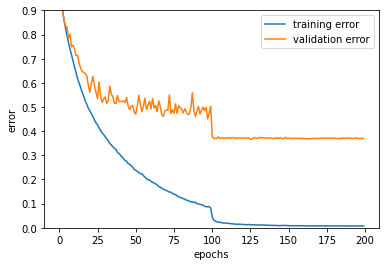

In [3]:
import matplotlib.pyplot as plt
plt.plot(1-log[1],label='training error')
plt.plot(1-log[2],label='validation error')
plt.ylim(0,0.9)
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend()

In [9]:
y_pred = model.predict(x_test)
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(y_test, y_pred)
m.result().numpy()

0.6283